In [1]:
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from qtaim_embed.models.utils import load_graph_level_model_from_config
from qtaim_embed.data.dataloader import DataLoaderMoleculeGraphTask
from qtaim_embed.core.dataset import HeteroGraphGraphLabelDataset
from qtaim_embed.models.utils import get_test_train_preds_as_df, test_and_predict_libe


In [16]:
qtaim_keys_high = {
    "atom": [
        #"extra_feat_atom_Lagrangian_K", 
      "extra_feat_atom_Hamiltonian_K",
       "extra_feat_atom_e_density", "extra_feat_atom_lap_e_density",
       "extra_feat_atom_e_loc_func", "extra_feat_atom_ave_loc_ion_E",
       "extra_feat_atom_delta_g_promolecular", "extra_feat_atom_delta_g_hirsh",
       "extra_feat_atom_esp_nuc", "extra_feat_atom_esp_e",
       "extra_feat_atom_esp_total", "extra_feat_atom_grad_norm",
       "extra_feat_atom_lap_norm", "extra_feat_atom_eig_hess",
       "extra_feat_atom_det_hessian", "extra_feat_atom_ellip_e_dens",
       "extra_feat_atom_eta","extra_feat_atom_energy_density"
    ],
    "bond": [
        "bond_length",
       "extra_feat_bond_Lagrangian_K", 
       "extra_feat_bond_Hamiltonian_K", "extra_feat_bond_e_density",
       "extra_feat_bond_lap_e_density", "extra_feat_bond_e_loc_func",
       "extra_feat_bond_ave_loc_ion_E", "extra_feat_bond_delta_g_promolecular",
       "extra_feat_bond_delta_g_hirsh", "extra_feat_bond_esp_nuc",
       "extra_feat_bond_esp_e", "extra_feat_bond_esp_total",
       "extra_feat_bond_grad_norm", "extra_feat_bond_lap_norm",
       "extra_feat_bond_eig_hess", "extra_feat_bond_det_hessian",
       "extra_feat_bond_ellip_e_dens", "extra_feat_bond_eta",
       "extra_feat_bond_energy_density", "extra_feat_bond_lol"

    ],
    "global": ["corrected_E", "spin", "charge"],
}


libe_loc = "../../../../data/splits_1205/test_libe_qtaim_1205_labelled_charge_1_neg_1_corrected.pkl"
libe_loc_train = (
    "../../../../data/splits_1205/train_libe_qtaim_1205_labelled_charge_0_corrected.pkl"
)

base_dict = {
    "atom": [],
    "bond": ["bond_length"],
    "global": ["corrected_E", "spin", "charge"],
}

dataset_dict = {}
keys_list = [
    base_dict,
    qtaim_keys_high,
]
for ind, feat_dict in enumerate(keys_list):
    if ind == 0:
        key = "base"
    elif ind == 1:
        key = "qtaim_full"

    dataset_dict[key + "_test"] = HeteroGraphGraphLabelDataset(
        file=libe_loc,
        allowed_ring_size=[3, 4, 5, 6, 7],
        allowed_charges=[-1, 0, 1],
        #allowed_charges=None,
        allowed_spins=[1, 2, 3],
        self_loop=True,
        extra_keys=feat_dict,
        target_list=["corrected_E"],
        extra_dataset_info={},
        debug=False,
        log_scale_features=False,
        log_scale_targets=False,
        standard_scale_features=True,
        standard_scale_targets=True,
    )
    dataset_dict[key + "_train"] = HeteroGraphGraphLabelDataset(
        file=libe_loc_train,
        allowed_ring_size=[3, 4, 5, 6, 7],
        allowed_charges=[-1, 0, 1],
        #allowed_charges=None,
        allowed_spins=[1, 2, 3],
        self_loop=True,
        extra_keys=feat_dict,
        target_list=["corrected_E"],
        extra_dataset_info={},
        debug=False,
        log_scale_features=False,
        log_scale_targets=False,
        standard_scale_features=True,
        standard_scale_targets=True,
    )


... > creating MoleculeWrapper objects


100%|██████████| 1110/1110 [00:00<00:00, 12963.87it/s]


... > bond_feats_error_count:  0
... > atom_feats_error_count:  0
element set {'Li', 'O', 'P', 'S', 'H', 'F', 'N', 'C'}
selected atomic keys []
selected bond keys ['bond_length']
selected global keys ['corrected_E', 'spin', 'charge']
... > Building graphs and featurizing


100%|██████████| 1110/1110 [00:01<00:00, 647.82it/s]


included in labels
{'global': ['corrected_E']}
included in graph features
{'atom': ['total_degree', 'total_H', 'is_in_ring', 'ring_size_3', 'ring_size_4', 'ring_size_5', 'ring_size_6', 'ring_size_7', 'chemical_symbol_Li', 'chemical_symbol_O', 'chemical_symbol_P', 'chemical_symbol_S', 'chemical_symbol_H', 'chemical_symbol_F', 'chemical_symbol_N', 'chemical_symbol_C'], 'bond': ['metal bond', 'ring inclusion', 'ring size_3', 'ring size_4', 'ring size_5', 'ring size_6', 'ring size_7', 'bond_length'], 'global': ['num atoms', 'num bonds', 'molecule weight', 'charge one hot', 'charge one hot', 'charge one hot', 'spin one hot', 'spin one hot', 'spin one hot']}
original loader node types: dict_keys(['atom', 'bond', 'global'])
original loader label types: dict_keys([])
include names:  dict_keys(['global'])
... > parsing labels and features in graphs


100%|██████████| 1110/1110 [00:00<00:00, 34506.18it/s]


original loader node types: dict_keys(['atom', 'bond', 'global'])
original loader label types: dict_keys(['global'])
... > Scaling features
mean [1.59800147 0.20296503 0.11065607 0.00892784 0.07134081 0.01629945
 0.01122123 0.00286674 0.0651978  0.24039643 0.01769187 0.00638873
 0.30682284 0.06536162 0.0023753  0.29576542]
std [1.37167057 0.53702711 0.31370576 0.09406452 0.25739328 0.12662456
 0.1053343  0.05346512 0.24687457 0.42732422 0.13182892 0.0796738
 0.46117522 0.24716286 0.0486791  0.45638606]
mean [0.         0.13223061 0.01064036 0.08502612 0.02079706 0.01392919
 0.00338557 1.49074973]
std [0.         0.33874131 0.10260185 0.27892056 0.14270439 0.11719715
 0.05808705 0.70256194]
Standard deviation for feature 0 is 0.0, smaller than 0.001. You may want to exclude this feature.
mean [ 10.9990991    9.31351351 112.06126749   0.54414414   0.
   0.45585586   0.44414414   0.40810811   0.14774775]
std [ 4.42851114  4.18737886 45.01069854  0.49804748  0.          0.49804748
  0.4968

100%|██████████| 5253/5253 [00:00<00:00, 14289.73it/s]


... > bond_feats_error_count:  0
... > atom_feats_error_count:  0
element set {'Li', 'O', 'P', 'S', 'H', 'F', 'N', 'C'}
selected atomic keys []
selected bond keys ['bond_length']
selected global keys ['corrected_E', 'spin', 'charge']
... > Building graphs and featurizing


100%|██████████| 5253/5253 [00:07<00:00, 662.65it/s]


included in labels
{'global': ['corrected_E']}
included in graph features
{'atom': ['total_degree', 'total_H', 'is_in_ring', 'ring_size_3', 'ring_size_4', 'ring_size_5', 'ring_size_6', 'ring_size_7', 'chemical_symbol_Li', 'chemical_symbol_O', 'chemical_symbol_P', 'chemical_symbol_S', 'chemical_symbol_H', 'chemical_symbol_F', 'chemical_symbol_N', 'chemical_symbol_C'], 'bond': ['metal bond', 'ring inclusion', 'ring size_3', 'ring size_4', 'ring size_5', 'ring size_6', 'ring size_7', 'bond_length'], 'global': ['num atoms', 'num bonds', 'molecule weight', 'charge one hot', 'charge one hot', 'charge one hot', 'spin one hot', 'spin one hot', 'spin one hot']}
original loader node types: dict_keys(['atom', 'bond', 'global'])
original loader label types: dict_keys([])
include names:  dict_keys(['global'])
... > parsing labels and features in graphs


100%|██████████| 5253/5253 [00:01<00:00, 4533.24it/s]


original loader node types: dict_keys(['atom', 'bond', 'global'])
original loader label types: dict_keys(['global'])
... > Scaling features
mean [1.61512333 0.20110438 0.12806577 0.00949345 0.07927467 0.02158236
 0.01430114 0.00341416 0.07110507 0.24583682 0.01660047 0.00646251
 0.30319816 0.06119356 0.00285674 0.29274666]
std [1.37125865 0.53267748 0.33416303 0.09697074 0.27016697 0.14531538
 0.11872919 0.05833097 0.25700027 0.43058225 0.12776892 0.08012958
 0.45964012 0.23968502 0.05337212 0.45502313]
mean [0.         0.15182755 0.01142985 0.09394483 0.0262418  0.01748095
 0.00456379 1.49032348]
std [0.         0.35885366 0.10629774 0.29175194 0.15985358 0.13105482
 0.06740151 0.69968514]
Standard deviation for feature 0 is 0.0, smaller than 0.001. You may want to exclude this feature.
mean [ 10.92861222   9.34342281 111.17101917   0.           1.
   0.           0.42470969   0.42718447   0.14810584]
std [ 4.41874048  4.15061172 44.20757698  0.          0.          0.
  0.49429887  0

100%|██████████| 1110/1110 [00:00<00:00, 3733.62it/s]


... > bond_feats_error_count:  0
... > atom_feats_error_count:  0
element set {'Li', 'O', 'P', 'S', 'H', 'F', 'N', 'C'}
selected atomic keys ['extra_feat_atom_Hamiltonian_K', 'extra_feat_atom_e_density', 'extra_feat_atom_lap_e_density', 'extra_feat_atom_e_loc_func', 'extra_feat_atom_ave_loc_ion_E', 'extra_feat_atom_delta_g_promolecular', 'extra_feat_atom_delta_g_hirsh', 'extra_feat_atom_esp_nuc', 'extra_feat_atom_esp_e', 'extra_feat_atom_esp_total', 'extra_feat_atom_grad_norm', 'extra_feat_atom_lap_norm', 'extra_feat_atom_eig_hess', 'extra_feat_atom_det_hessian', 'extra_feat_atom_ellip_e_dens', 'extra_feat_atom_eta', 'extra_feat_atom_energy_density']
selected bond keys ['bond_length', 'extra_feat_bond_Lagrangian_K', 'extra_feat_bond_Hamiltonian_K', 'extra_feat_bond_e_density', 'extra_feat_bond_lap_e_density', 'extra_feat_bond_e_loc_func', 'extra_feat_bond_ave_loc_ion_E', 'extra_feat_bond_delta_g_promolecular', 'extra_feat_bond_delta_g_hirsh', 'extra_feat_bond_esp_nuc', 'extra_feat_bond

100%|██████████| 1110/1110 [00:01<00:00, 651.72it/s]


included in labels
{'global': ['corrected_E']}
included in graph features
{'atom': ['total_degree', 'total_H', 'is_in_ring', 'ring_size_3', 'ring_size_4', 'ring_size_5', 'ring_size_6', 'ring_size_7', 'chemical_symbol_Li', 'chemical_symbol_O', 'chemical_symbol_P', 'chemical_symbol_S', 'chemical_symbol_H', 'chemical_symbol_F', 'chemical_symbol_N', 'chemical_symbol_C', 'extra_feat_atom_Hamiltonian_K', 'extra_feat_atom_e_density', 'extra_feat_atom_lap_e_density', 'extra_feat_atom_e_loc_func', 'extra_feat_atom_ave_loc_ion_E', 'extra_feat_atom_delta_g_promolecular', 'extra_feat_atom_delta_g_hirsh', 'extra_feat_atom_esp_nuc', 'extra_feat_atom_esp_e', 'extra_feat_atom_esp_total', 'extra_feat_atom_grad_norm', 'extra_feat_atom_lap_norm', 'extra_feat_atom_eig_hess', 'extra_feat_atom_det_hessian', 'extra_feat_atom_ellip_e_dens', 'extra_feat_atom_eta', 'extra_feat_atom_energy_density'], 'bond': ['metal bond', 'ring inclusion', 'ring size_3', 'ring size_4', 'ring size_5', 'ring size_6', 'ring size_7

100%|██████████| 1110/1110 [00:00<00:00, 35620.82it/s]


original loader node types: dict_keys(['atom', 'bond', 'global'])
original loader label types: dict_keys(['global'])
... > Scaling features
mean [ 1.59800147e+00  2.02965026e-01  1.10656073e-01  8.92784012e-03
  7.13408142e-02  1.62994512e-02  1.12212302e-02  2.86673765e-03
  6.51978049e-02  2.40396429e-01  1.76918667e-02  6.38872963e-03
  3.06822836e-01  6.53616185e-02  2.37529691e-03  2.95765419e-01
  1.02744022e+06 -1.02744022e+06 -4.10892845e+06  9.99934836e-01
  1.07936542e+01  6.45586140e-02  1.06031559e-01  1.93058424e+07
 -2.55131215e+01  1.93058168e+07  3.40321637e-10 -4.10892845e+06
 -4.10892845e+06 -7.17746693e+20  2.75969203e-04 -1.02862754e+00
 -1.02744022e+06]
std [1.37167057e+00 5.37027114e-01 3.13705765e-01 9.40645193e-02
 2.57393283e-01 1.26624560e-01 1.05334298e-01 5.34651238e-02
 2.46874566e-01 4.27324216e-01 1.31828921e-01 7.96737959e-02
 4.61175220e-01 2.47162856e-01 4.86791010e-02 4.56386060e-01
 3.49477023e+06 3.49477023e+06 1.39745808e+07 3.14492053e-04
 1.26110

100%|██████████| 5253/5253 [00:01<00:00, 3635.97it/s]


... > bond_feats_error_count:  0
... > atom_feats_error_count:  0
element set {'Li', 'O', 'P', 'S', 'H', 'F', 'N', 'C'}
selected atomic keys ['extra_feat_atom_Hamiltonian_K', 'extra_feat_atom_e_density', 'extra_feat_atom_lap_e_density', 'extra_feat_atom_e_loc_func', 'extra_feat_atom_ave_loc_ion_E', 'extra_feat_atom_delta_g_promolecular', 'extra_feat_atom_delta_g_hirsh', 'extra_feat_atom_esp_nuc', 'extra_feat_atom_esp_e', 'extra_feat_atom_esp_total', 'extra_feat_atom_grad_norm', 'extra_feat_atom_lap_norm', 'extra_feat_atom_eig_hess', 'extra_feat_atom_det_hessian', 'extra_feat_atom_ellip_e_dens', 'extra_feat_atom_eta', 'extra_feat_atom_energy_density']
selected bond keys ['bond_length', 'extra_feat_bond_Lagrangian_K', 'extra_feat_bond_Hamiltonian_K', 'extra_feat_bond_e_density', 'extra_feat_bond_lap_e_density', 'extra_feat_bond_e_loc_func', 'extra_feat_bond_ave_loc_ion_E', 'extra_feat_bond_delta_g_promolecular', 'extra_feat_bond_delta_g_hirsh', 'extra_feat_bond_esp_nuc', 'extra_feat_bond

100%|██████████| 5253/5253 [00:08<00:00, 653.17it/s]


included in labels
{'global': ['corrected_E']}
included in graph features
{'atom': ['total_degree', 'total_H', 'is_in_ring', 'ring_size_3', 'ring_size_4', 'ring_size_5', 'ring_size_6', 'ring_size_7', 'chemical_symbol_Li', 'chemical_symbol_O', 'chemical_symbol_P', 'chemical_symbol_S', 'chemical_symbol_H', 'chemical_symbol_F', 'chemical_symbol_N', 'chemical_symbol_C', 'extra_feat_atom_Hamiltonian_K', 'extra_feat_atom_e_density', 'extra_feat_atom_lap_e_density', 'extra_feat_atom_e_loc_func', 'extra_feat_atom_ave_loc_ion_E', 'extra_feat_atom_delta_g_promolecular', 'extra_feat_atom_delta_g_hirsh', 'extra_feat_atom_esp_nuc', 'extra_feat_atom_esp_e', 'extra_feat_atom_esp_total', 'extra_feat_atom_grad_norm', 'extra_feat_atom_lap_norm', 'extra_feat_atom_eig_hess', 'extra_feat_atom_det_hessian', 'extra_feat_atom_ellip_e_dens', 'extra_feat_atom_eta', 'extra_feat_atom_energy_density'], 'bond': ['metal bond', 'ring inclusion', 'ring size_3', 'ring size_4', 'ring size_5', 'ring size_6', 'ring size_7

100%|██████████| 5253/5253 [00:00<00:00, 34341.49it/s]


original loader node types: dict_keys(['atom', 'bond', 'global'])
original loader label types: dict_keys(['global'])
... > Scaling features
mean [ 1.61512333e+00  2.01104376e-01  1.28065775e-01  9.49345039e-03
  7.92746656e-02  2.15823579e-02  1.43011427e-02  3.41415831e-03
  7.11050725e-02  2.45836817e-01  1.66004738e-02  6.46251394e-03
  3.03198161e-01  6.11935619e-02  2.85674470e-03  2.92746656e-01
  1.00415447e+06 -1.00415447e+06 -4.01581176e+06  9.99935986e-01
  1.07184923e+01  6.46326660e-02  1.06502904e-01  2.71801115e+06
 -2.54500453e+01  2.71798569e+06  3.29326967e-10 -4.01581176e+06
 -4.01581176e+06 -6.99630040e+20  2.72042102e-04 -1.02854912e+00
 -1.00415447e+06]
std [1.37125865e+00 5.32677479e-01 3.34163032e-01 9.69707419e-02
 2.70166972e-01 1.45315380e-01 1.18729188e-01 5.83309680e-02
 2.57000275e-01 4.30582253e-01 1.27768925e-01 8.01295816e-02
 4.59640116e-01 2.39685022e-01 5.33721249e-02 4.55023133e-01
 3.44278135e+06 3.44278135e+06 1.37666872e+07 2.65045951e-04
 1.24484

In [17]:
for k, v in dataset_dict.items():
    print(v.feature_size())

{'atom': 16, 'bond': 8, 'global': 9}
{'atom': 16, 'bond': 8, 'global': 9}
{'atom': 33, 'bond': 27, 'global': 9}
{'atom': 33, 'bond': 27, 'global': 9}


In [29]:
qtaim_model_bl_dict = {
    "atom_feature_size": 33,
    "bond_feature_size": 27,
    "global_feature_size": 9,
    "conv_fn": "ResidualBlock",
    "target_dict": {"global": ["corrected_E"]},
    "dropout": 0.2,
    "batch_norm_tf": True,
    "activation": "ReLU",
    "bias": True,
    "norm": "both",
    "aggregate": "sum",
    "n_conv_layers": 4,
    "lr": 0.001,
    "weight_decay": 1e-04,
    "lr_plateau_patience": 25,
    "lr_scale_factor": 0.25,
    "scheduler_name": "reduce_on_plateau",
    "loss_fn": "mse",
    "resid_n_graph_convs": 4,
    "embedding_size": 100,
    "fc_layer_size": [512, 512, 512],
    "shape_fc": "flat",
    "fc_dropout": 0.2,
    "fc_batch_norm": True,
    "n_fc_layers": 3,
    "global_pooling_fn": "GlobalAttentionPoolingThenCat",
    "ntypes_pool": ["atom", "bond", "global"],
    "ntypes_pool_direct_cat": ["global"],
    "lstm_iters": 15,
    "lstm_layers": 3,
    "num_heads": 1,
    "feat_drop": 0.2,
    "attn_drop": 0.1,
    "residual": True,
    "ntasks": 1,
    "num_heads_gat": 1,
    "dropout_feat_gat": 0.2,
    "dropout_attn_gat": 0.1,
    "hidden_size_gat": 100,
    "residual_gat": True,
    "shape_fc": "flat",
    "classifier": False,
    "batch_norm": False,
    "pooling_ntypes": ["atom", "bond", "global"],
    "pooling_ntypes_direct": ["global"],
    "fc_hidden_size_1": 512,
    "fc_num_layers": 3,
    "restore": False,
    "classifier": False,
}

non_qtaim_model_bl_dict = {
    "atom_feature_size": 16,
    "bond_feature_size": 8,
    "global_feature_size": 9,
    "conv_fn": "GraphConvDropoutBatch",
    "target_dict": {"global": ["corrected_E"]},
    "dropout": 0.2,
    "batch_norm_tf": True,
    "activation": "ReLU",
    "bias": True,
    "norm": "both",
    "fc_num_layers": 3,
    "aggregate": "sum",
    "n_conv_layers": 5,
    "lr": 0.001,
    "weight_decay": 1e-05,
    "lr_plateau_patience": 25,
    "lr_scale_factor": 0.5,
    "scheduler_name": "reduce_on_plateau",
    "loss_fn": "mse",
    "resid_n_graph_convs": 2,
    "embedding_size": 50,
    "fc_layer_size": [1024, 512, 256],
    "fc_dropout": 0.1,
    "fc_batch_norm": True,
    "n_fc_layers": 3,
    "global_pooling_fn": "SumPoolingThenCat",
    "ntypes_pool": ["atom", "bond", "global"],
    "ntypes_pool_direct_cat": ["global"],
    "lstm_iters": 9,
    "lstm_layers": 2,
    "num_heads": 3,
    "feat_drop": 0.1,
    "attn_drop": 0.1,
    "residual": False,
    "hidden_size": 10,
    "ntasks": 1,
    "shape_fc": "cone",
    "num_heads_gat": 3,
    "dropout_feat_gat": 0.1,
    "dropout_attn_gat": 0.1,
    "hidden_size_gat": 10,
    "residual_gat": False,
    "batch_norm": True,
    "pooling_ntypes": ["atom", "bond", "global"],
    "pooling_ntypes_direct": ["global"],
    "fc_hidden_size_1": 512,
    "restore": False,
    "classifier": False,
}


model_temp_qtaim = load_graph_level_model_from_config(qtaim_model_bl_dict)
model_temp_noqtaim = load_graph_level_model_from_config(non_qtaim_model_bl_dict)


:::REGRESSION MODEL:::
readout in size 201
... > number of tasks: 1
:::REGRESSION MODEL:::
readout in size 150
... > number of tasks: 1


In [19]:
import pytorch_lightning as pl
from pytorch_lightning.callbacks import LearningRateMonitor, EarlyStopping

dataloader_train = DataLoaderMoleculeGraphTask(
    dataset_dict["qtaim_full_train"], batch_size=512, shuffle=True, num_workers=0
)
dataloader_test = DataLoaderMoleculeGraphTask(
    dataset_dict["qtaim_full_test"],
    batch_size=len(dataset_dict["qtaim_full_test"].graphs),
    shuffle=False,
    num_workers=0,
)
early_stopping_callback = EarlyStopping(
    monitor="val_mae", min_delta=0.00, patience=100, verbose=False, mode="min"
)
lr_monitor = LearningRateMonitor(logging_interval="step")

trainer = pl.Trainer(
    max_epochs=1000,
    accelerator="gpu",
    gradient_clip_val=10.0,
    devices=1,
    accumulate_grad_batches=1,
    enable_progress_bar=True,
    callbacks=[
        early_stopping_callback,
        lr_monitor,
    ],
    enable_checkpointing=True,
    strategy="auto",
    # default_root_dir=model_save_string,
    default_root_dir="./test/",
    precision="bf16-mixed",
)
trainer.fit(model_temp_qtaim, dataloader_train)
trainer.save_checkpoint(f"retrain_qtaim_libe_big_small.ckpt")


Using bfloat16 Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/santiagovargas/anaconda3/envs/qtaim_embed/lib/python3.11/site-packages/pytorch_lightning/trainer/configuration_validator.py:71: PossibleUserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

   | Name            | Type                          | Params
-------------------------------------------------------------------
0  | activation      | ReLU                          | 0     
1  | embedding       | UnifySize                     | 6.9 K 
2  | conv_layers     | ModuleList                    | 333 K 
3  | readout         | GlobalAttentionPoolingThenCat | 204   
4  | loss            | MeanSquaredError              | 0     
5  | fc_layers       | ModuleList                    | 632 K 


Training: 0it [00:00, ?it/s]

Epoch 00027: reducing learning rate of group 0 to 2.5000e-04.
Epoch 00053: reducing learning rate of group 0 to 6.2500e-05.
Epoch 00079: reducing learning rate of group 0 to 1.5625e-05.


In [28]:
from qtaim_embed.models.utils import test_and_predict_libe, test_and_predict, get_charge_spin_libe

model_temp_qtaim.cpu()
val_results = test_and_predict_libe(
    dataset_dict["qtaim_full_test"], dataset_dict["qtaim_full_train"], model_temp_qtaim
)


data_test_loader = DataLoaderMoleculeGraphTask(
    dataset_dict["qtaim_full_test"],
    batch_size=len(dataset_dict["qtaim_full_test"].graphs),
    shuffle=False,
)
batch_graph, batched_labels = next(iter(data_test_loader))
(
    mean_mae_test,
    mean_rmse_test,
    ewt_prop_test,
    _,
    _,
) = model_temp_qtaim.evaluate_manually(
    batch_graph=batch_graph,
    batch_label=batched_labels,
    scaler_list=dataset_dict["qtaim_full_train"].label_scalers,
    per_atom=True,
)


str_dataset = "qtaim_full"
results_dict = {"qtaim_full": {}}
results_dict[str_dataset]["test_r2"] = val_results["statistics_dict"]["test"]["r2"]
results_dict[str_dataset]["test_preds"] = val_results["preds_test"]
results_dict[str_dataset]["test_labels"] = val_results["label_list"]
results_dict[str_dataset]["train_preds"] = val_results["preds_train"]
results_dict[str_dataset]["train_labels"] = val_results["label_list_train"]
results_dict[str_dataset]["statistics_dict"] = val_results["statistics_dict"]
results_dict[str_dataset]["test_mae_per"] = mean_mae_test
results_dict[str_dataset]["test_mse_per"] = mean_rmse_test
results_dict[str_dataset]["test_ewt_per"] = ewt_prop_test
results_dict[str_dataset]["charge_list_test"] = val_results["charge_list_test"]
results_dict[str_dataset]["spin_list_test"] = val_results["spin_list_test"]
results_dict[str_dataset]["charge_list_train"] = val_results["charge_list_train"]
results_dict[str_dataset]["spin_list_train"] = val_results["spin_list_train"]


df_test, df_train = get_test_train_preds_as_df(results_dict, "qtaim_full")


----------------------------------------------------------------------------------------------------
Performance training set:	 r2: 0.8994	 mae: 0.4832	 mse: 0.6380
Performance test set:	 r2: 0.5959	 mae: 2.3044	 mse: 2.9936
----------------------------------------------------------------------------------------------------


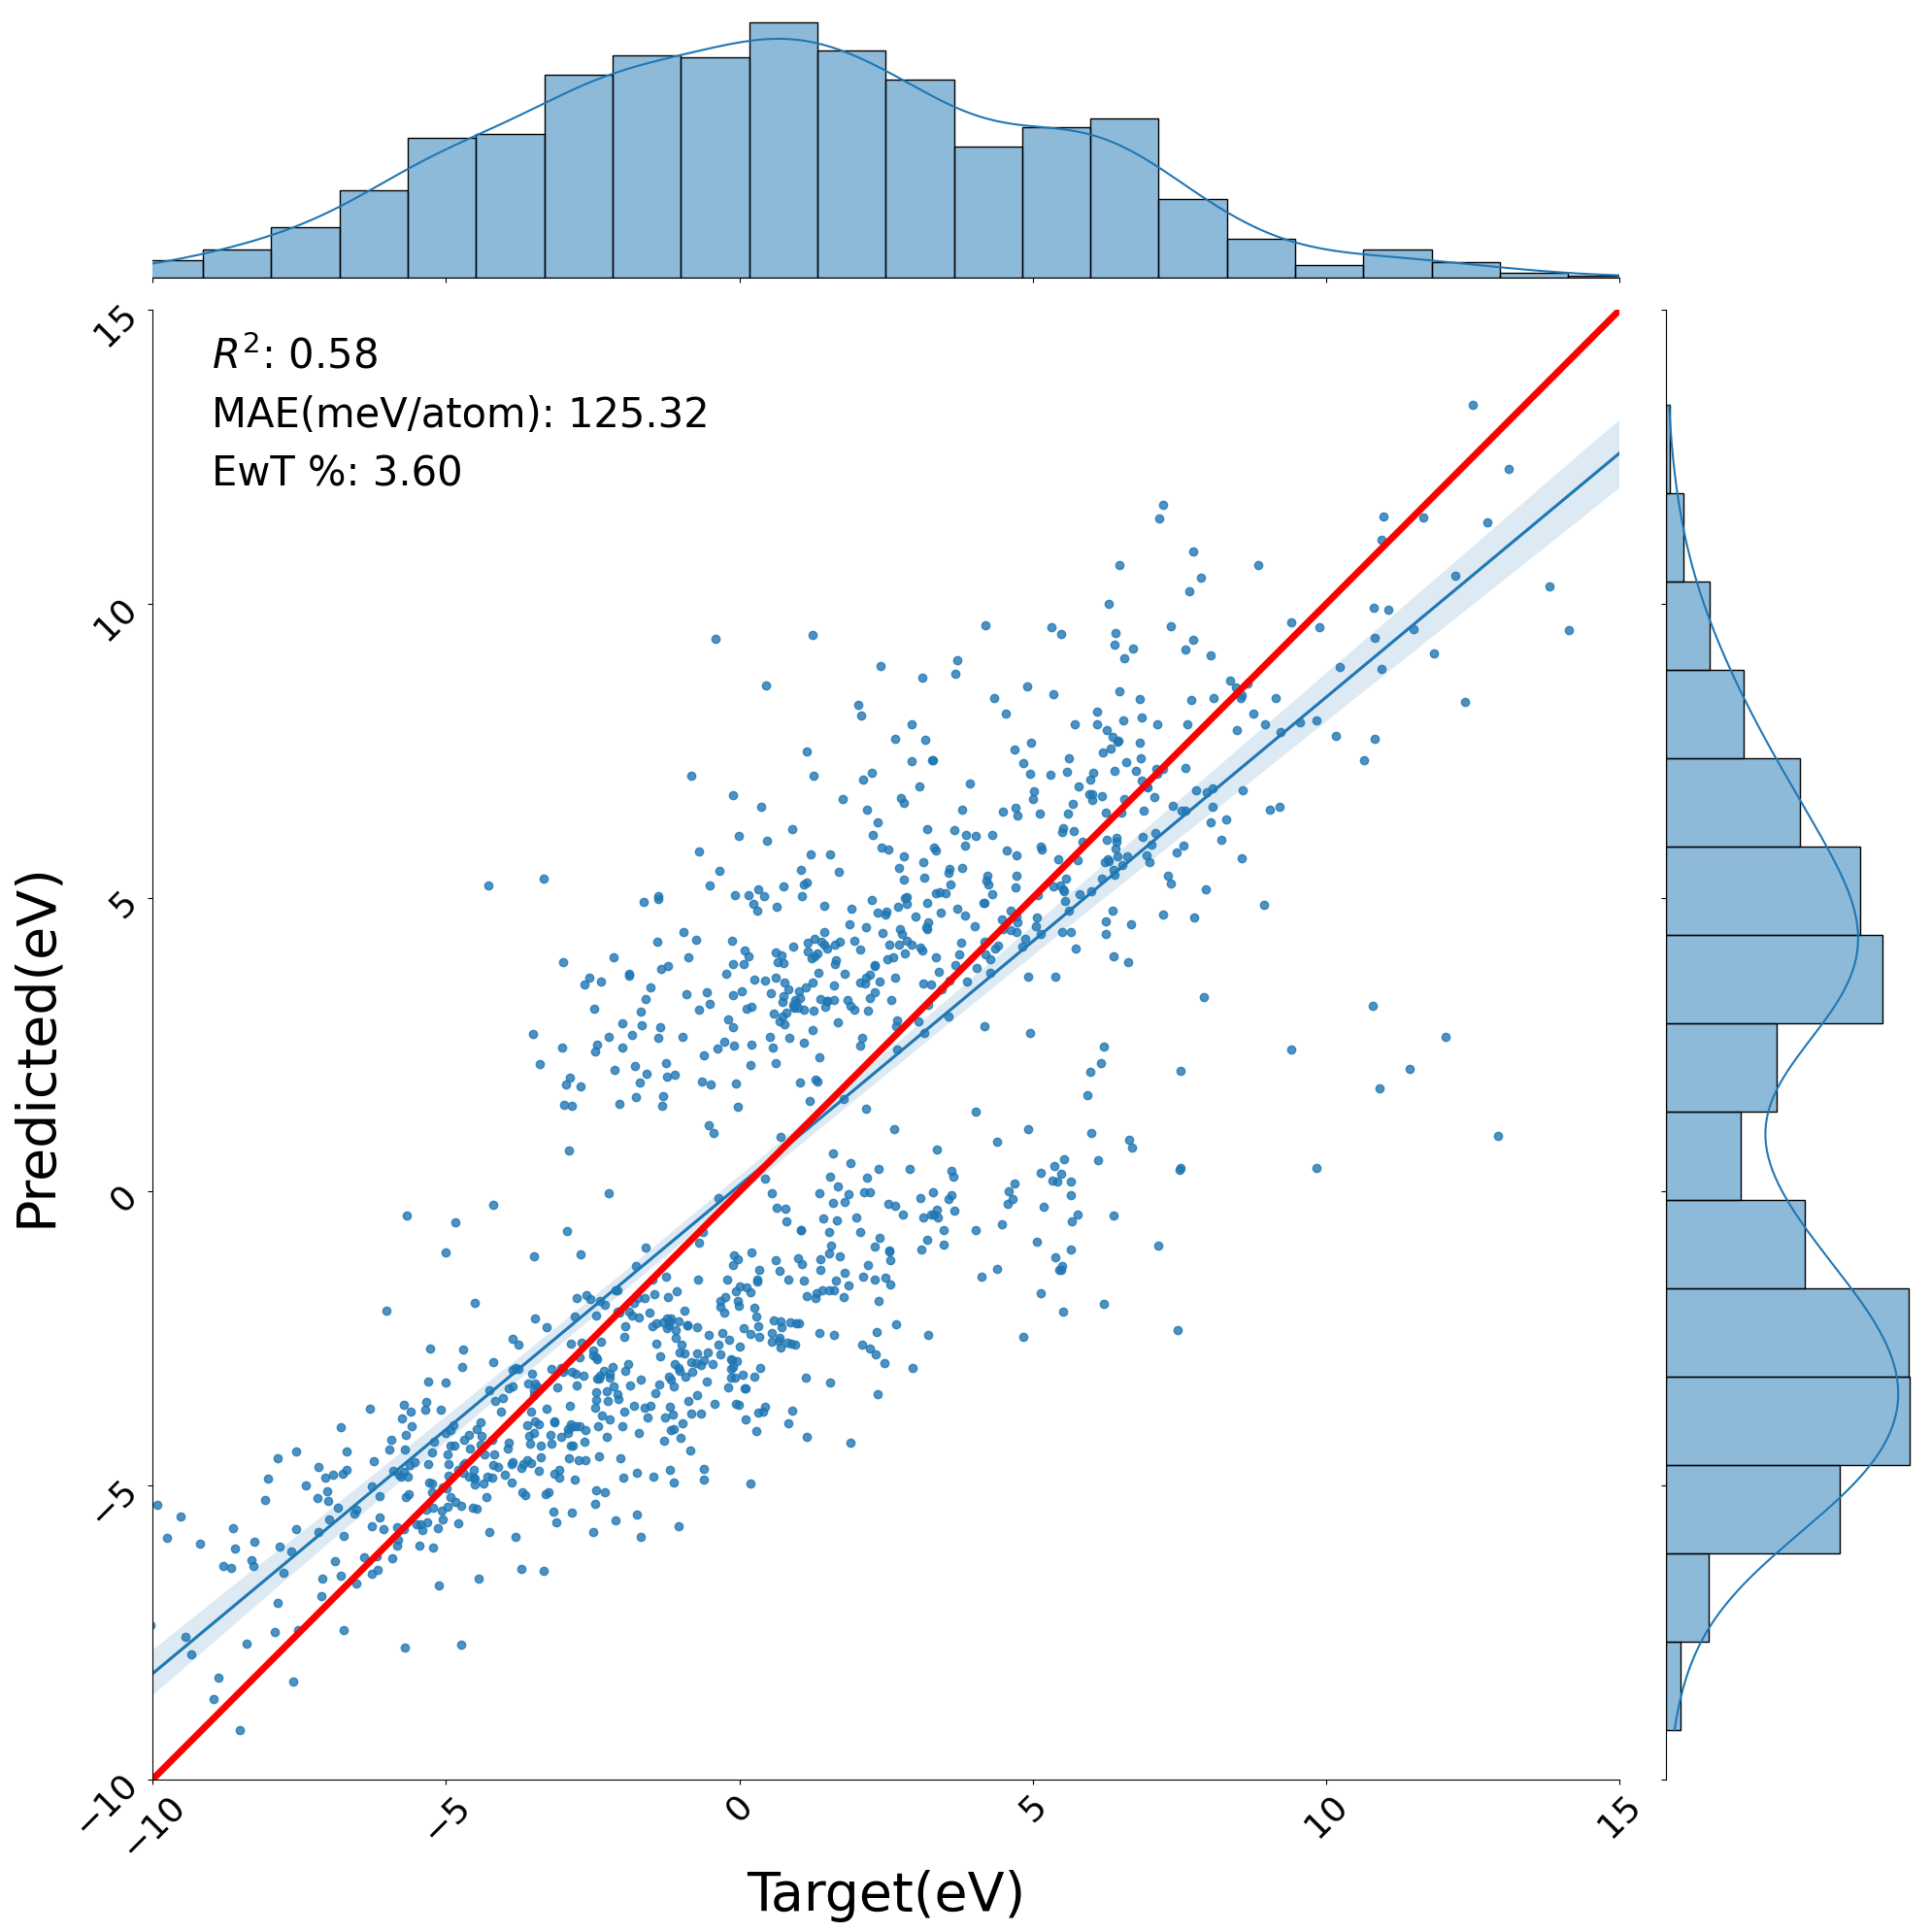

In [21]:
# specify number of bins
num_bins = 50
# make jointplots
sns.jointplot(
    x="preds",
    y="labels",
    data=df_test,
    kind="reg",
    height=20,
    space=0,
    ylim=(-10, 15),
    xlim=(-10, 15),
    # joint_kws={"line_kws": {"color": "red"}},
    # joint_kws={"gridsize": 80},
).set_axis_labels("Target(eV)", "Predicted(eV)")
# set font sizes
plt.xlabel("Target(eV)", fontsize=40)
plt.ylabel("Predicted(eV)", fontsize=40)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
# rotate xticks
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
# add diagonal line
plt.plot([-10, 15], [-10, 15], linewidth=5, color="red")
# add statistics
plt.text(
    -9,
    14,
    "$R^2$: {:.2f}".format(results_dict["qtaim_full"]["statistics_dict"]["test"]["r2"]),
    fontsize=30,
)


plt.text(
    -9,
    13,
    "MAE(meV/atom): {:.2f}".format(results_dict["qtaim_full"]["test_mae_per"] * 1000),
    fontsize=30,
)

plt.text(
    -9,
    12,
    "EwT %: {:.2f}".format(results_dict["qtaim_full"]["test_ewt_per"] * 100),
    fontsize=30,
)
# add title
plt.show()


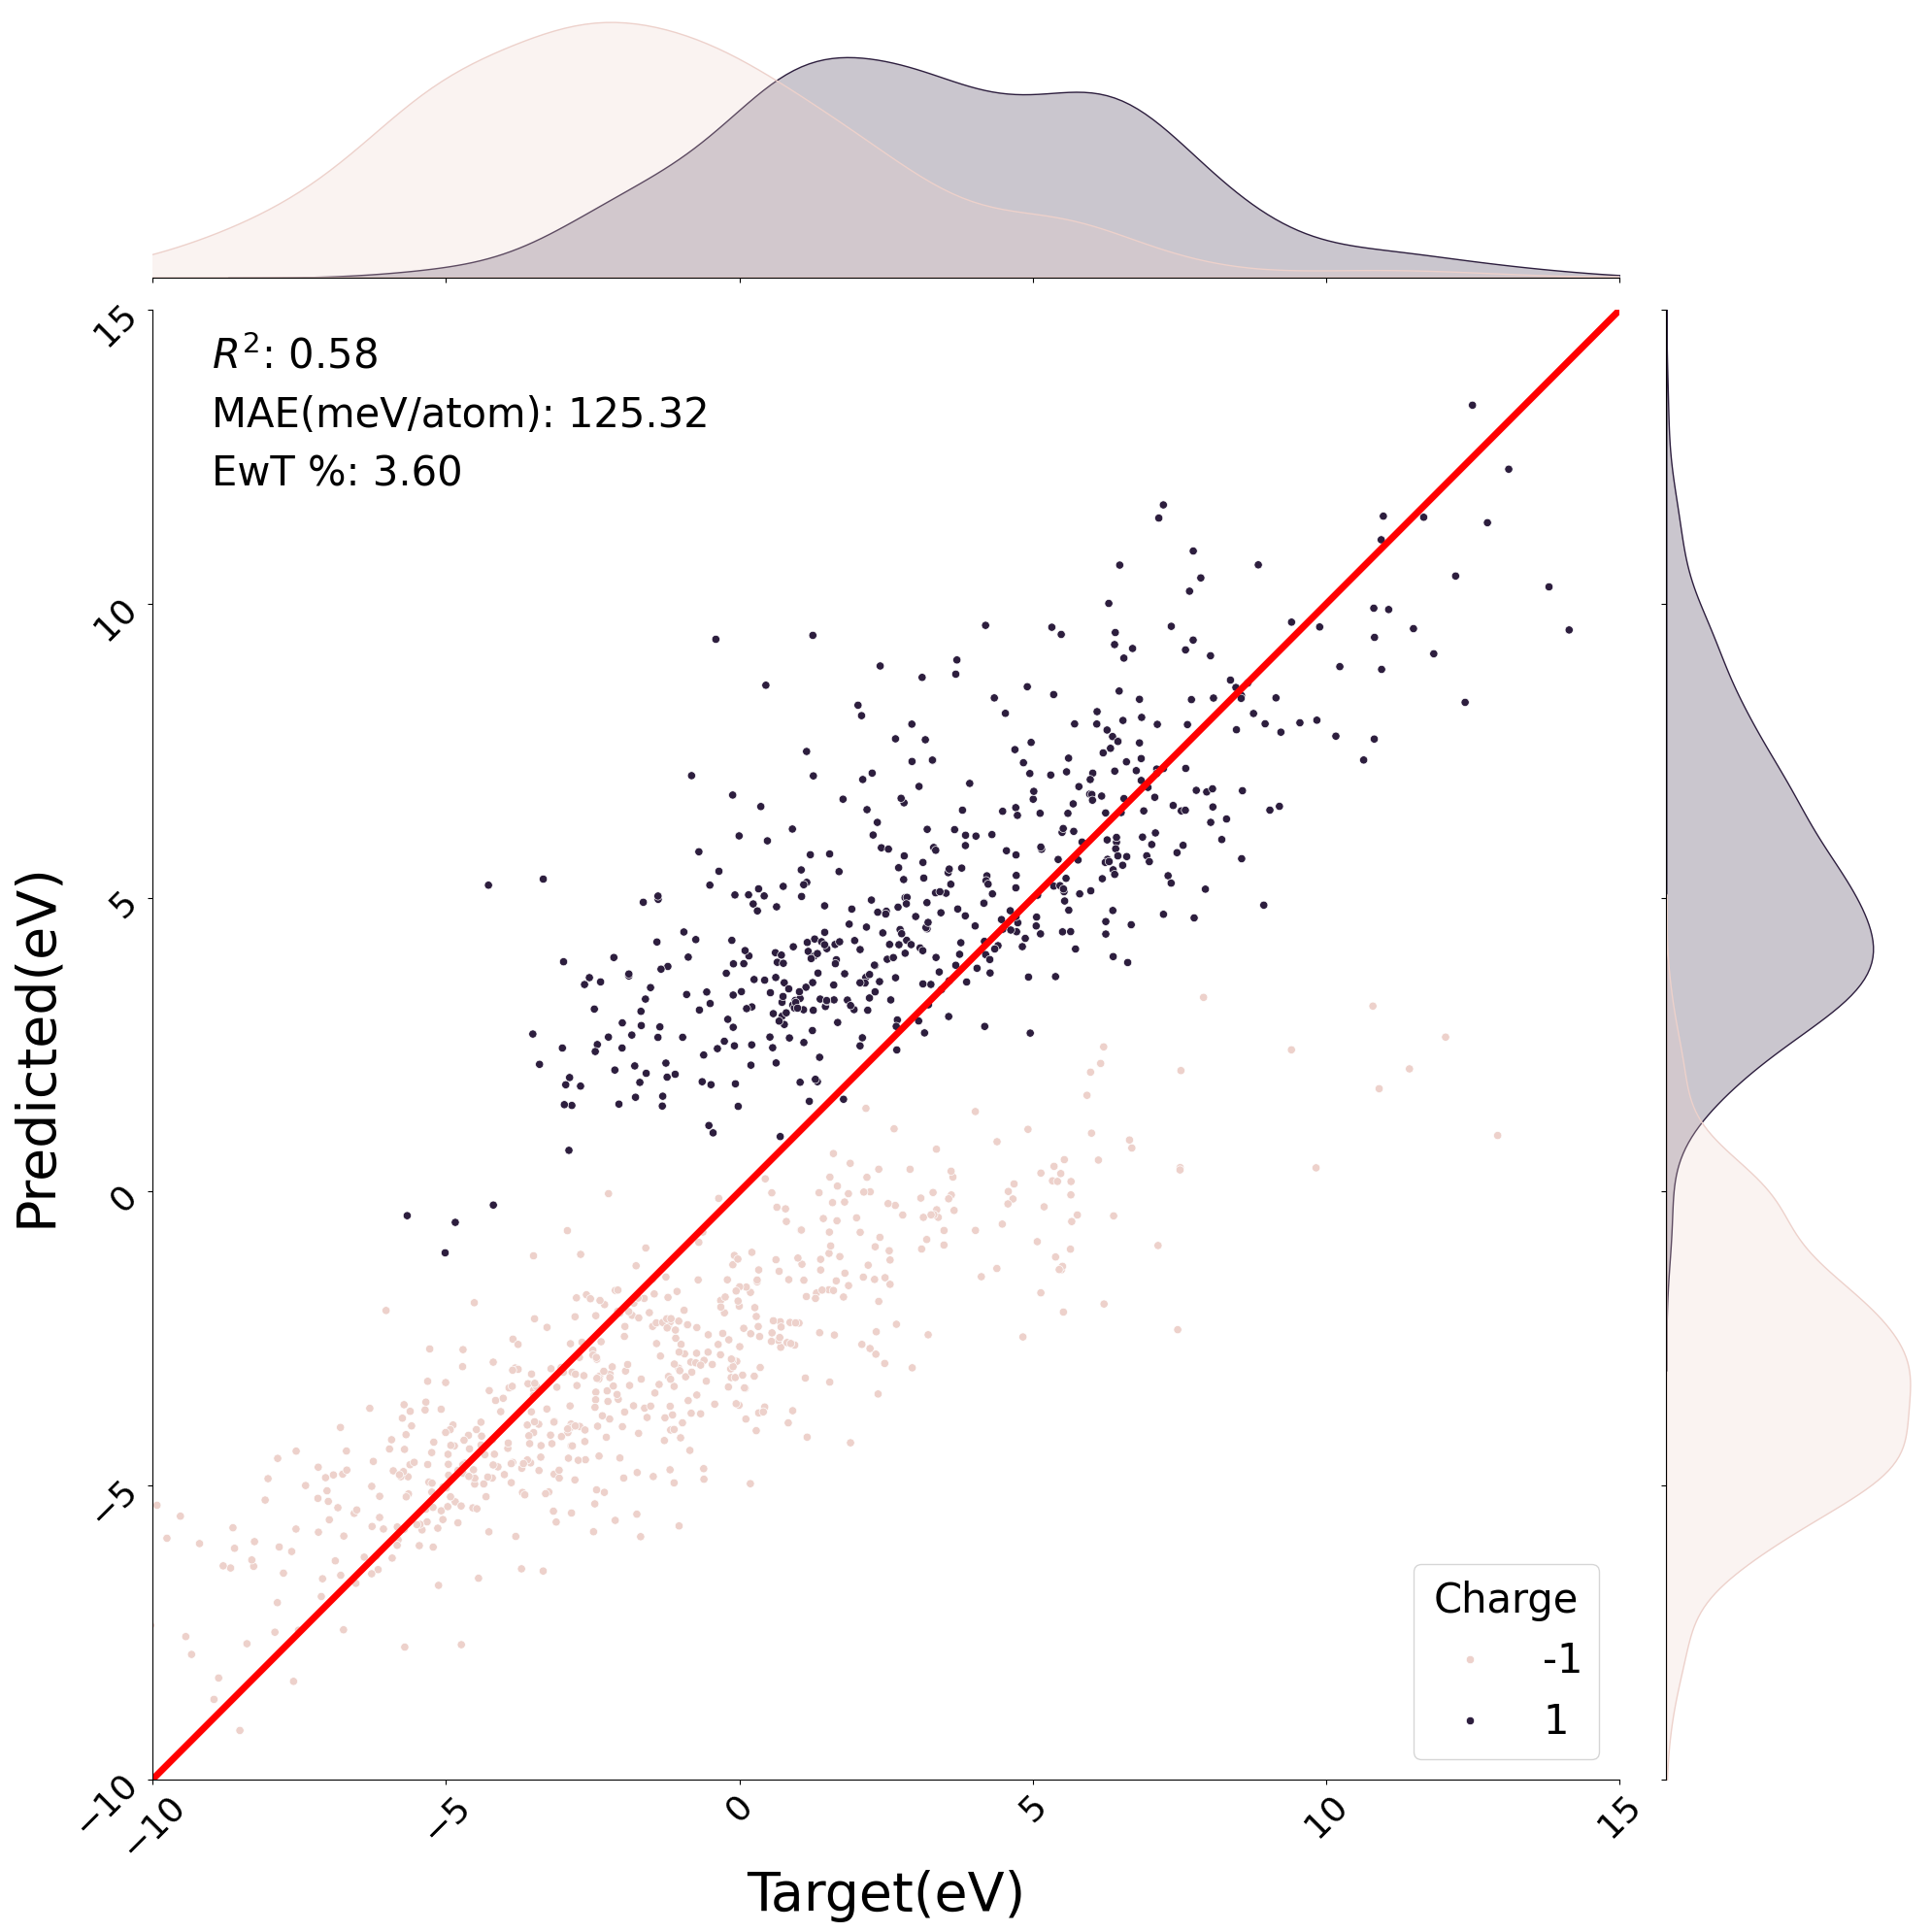

In [22]:
# specify number of bins
num_bins = 50
# make jointplots
sns.jointplot(
    x="preds",
    y="labels",
    data=df_test,
    # kind="reg",
    hue="charge",
    height=20,
    space=0,
    ylim=(-10, 15),
    xlim=(-10, 15),
    # joint_kws={"line_kws": {"color": "red"}},
    # joint_kws={"gridsize": 80},
).set_axis_labels("Target(eV)", "Predicted(eV)")
# set font sizes
plt.xlabel("Target(eV)", fontsize=40)
plt.ylabel("Predicted(eV)", fontsize=40)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
# rotate xticks
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
# add diagonal line
plt.plot([-10, 15], [-10, 15], linewidth=5, color="red")
# add statistics
plt.text(
    -9,
    14,
    "$R^2$: {:.2f}".format(results_dict["qtaim_full"]["statistics_dict"]["test"]["r2"]),
    fontsize=30,
)

plt.text(
    -9,
    13,
    "MAE(meV/atom): {:.2f}".format(results_dict["qtaim_full"]["test_mae_per"] * 1000),
    fontsize=30,
)

plt.text(
    -9,
    12,
    "EwT %: {:.2f}".format(results_dict["qtaim_full"]["test_ewt_per"] * 100),
    fontsize=30,
)

#["test_ewt_per"] * 100
plt.legend(fontsize=30, loc="lower right", title="Charge", title_fontsize=30)
# add title
plt.show()

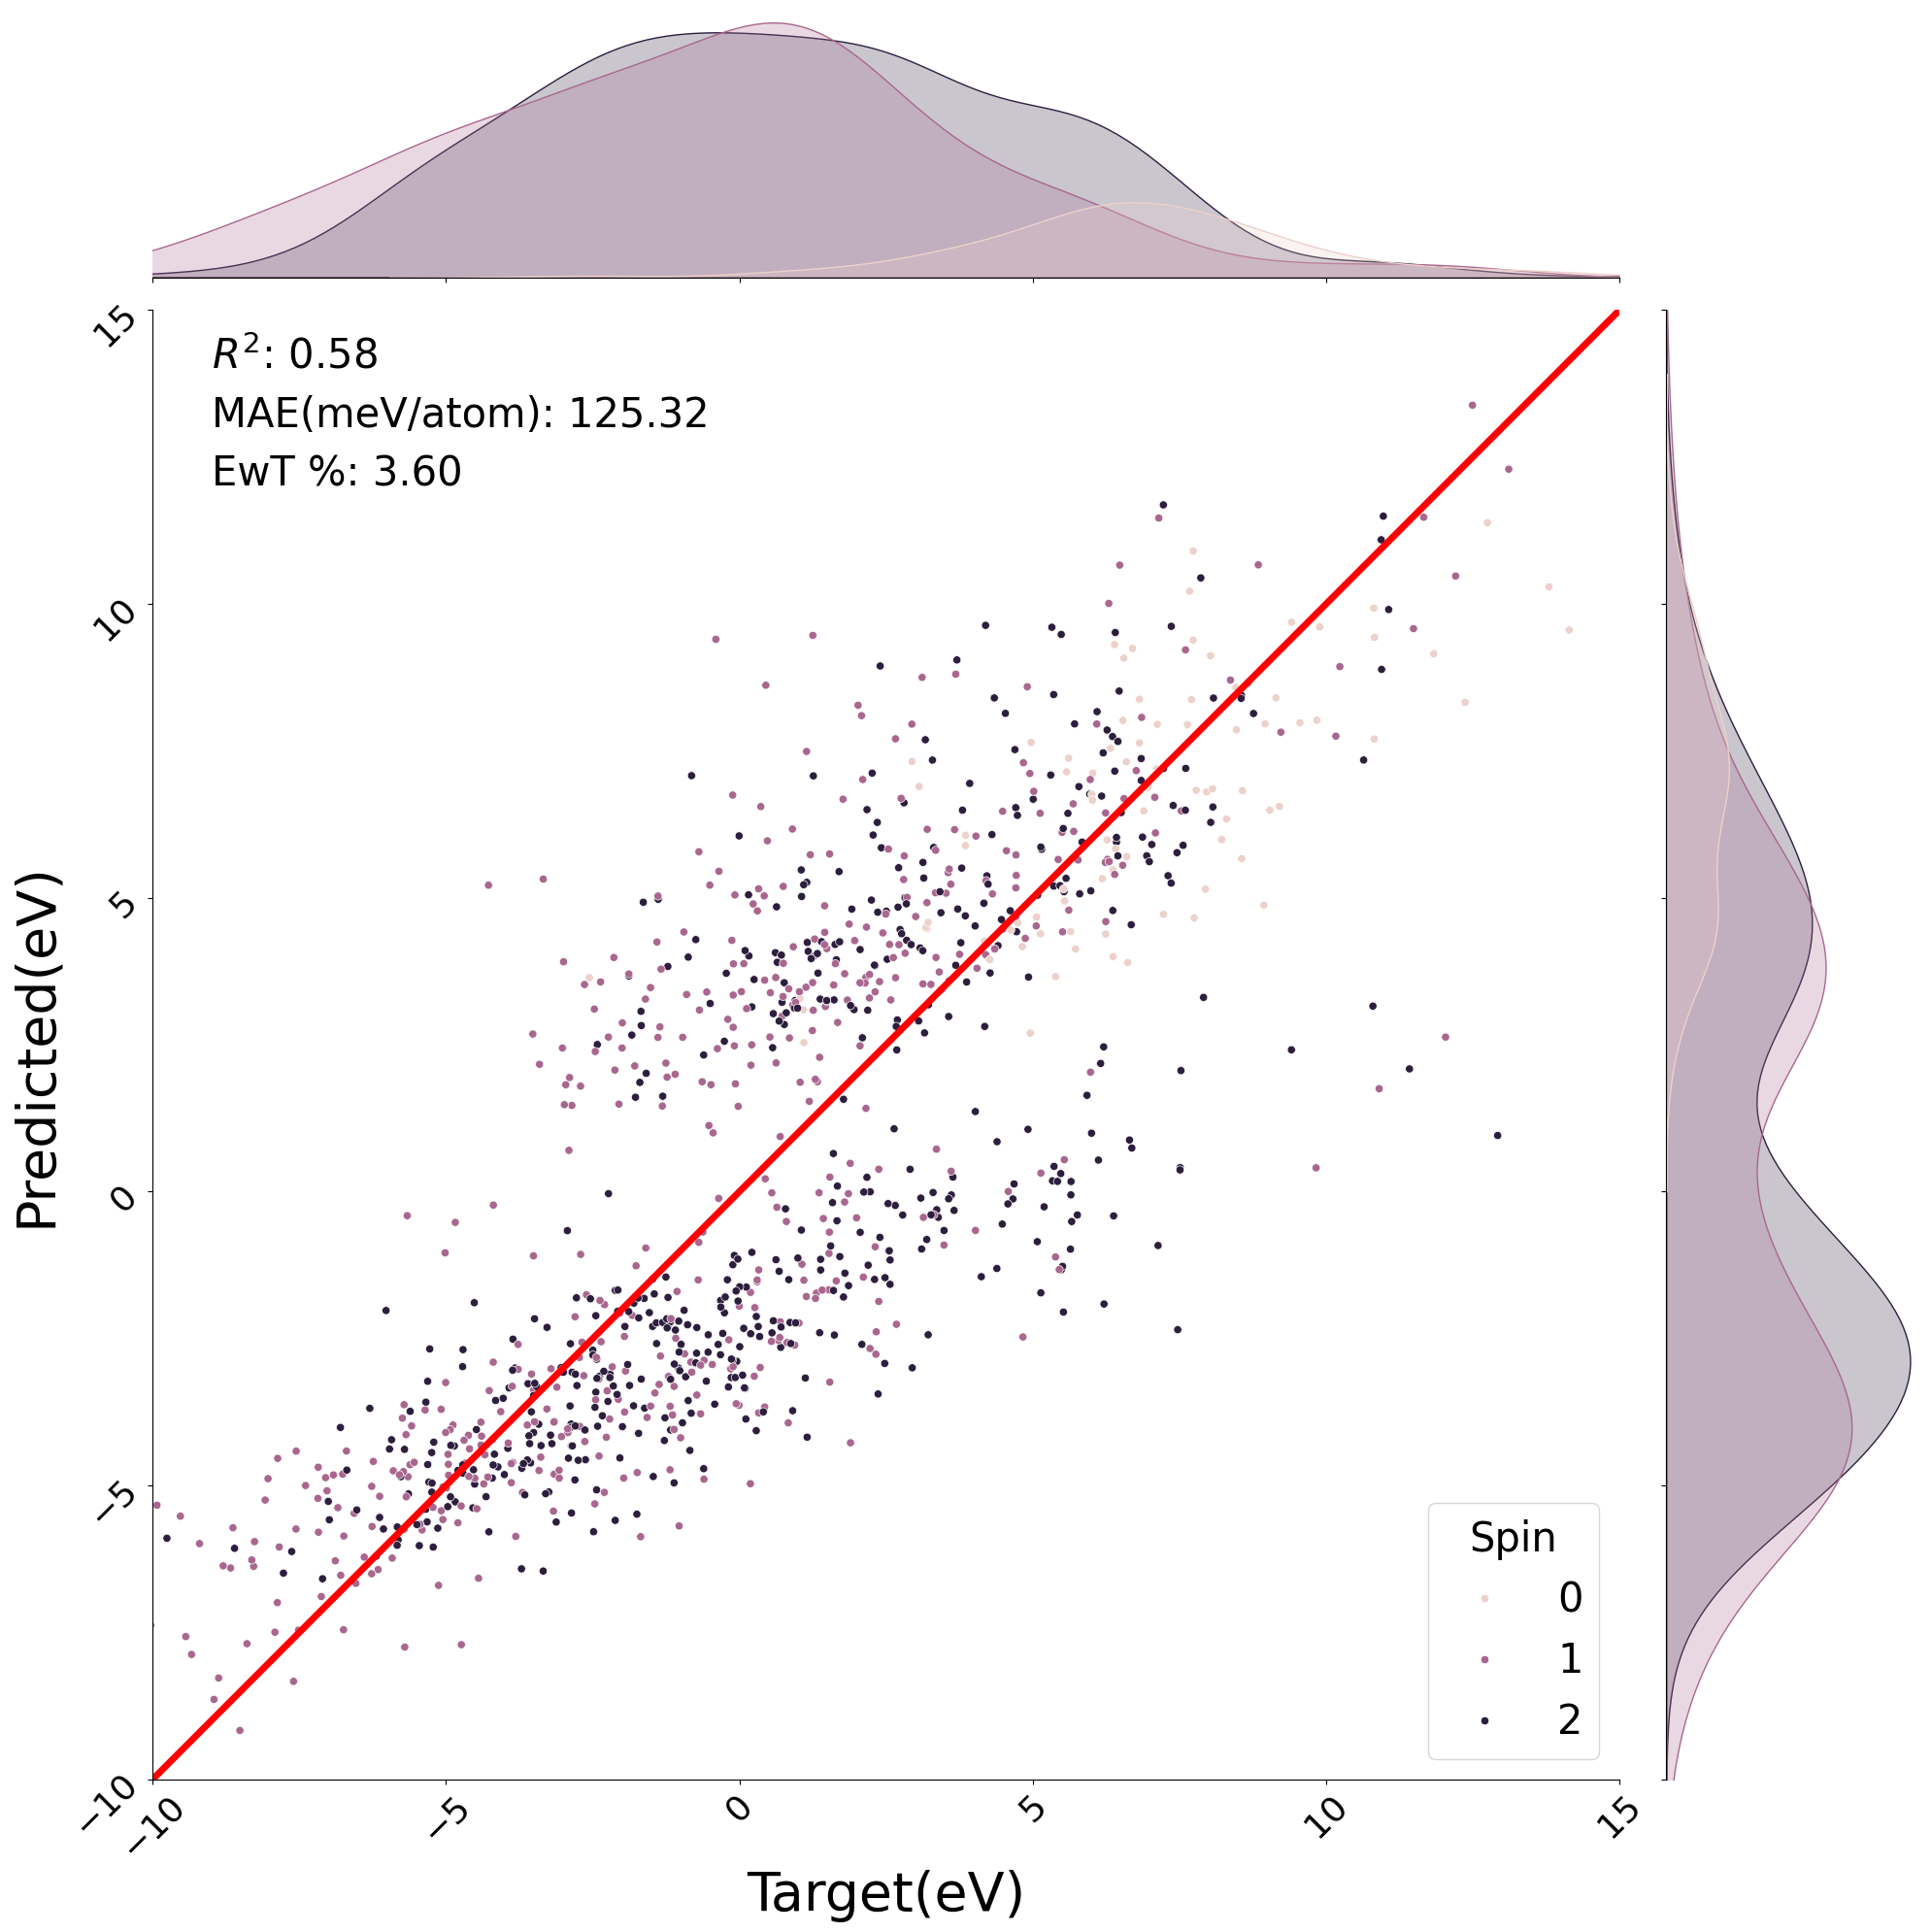

In [23]:
# specify number of bins
num_bins = 50
# make jointplots
sns.jointplot(
    x="preds",
    y="labels",
    data=df_test,
    # kind="reg",
    hue="spin",
    height=20,
    space=0,
    ylim=(-10, 15),
    xlim=(-10, 15),
    # joint_kws={"line_kws": {"color": "red"}},
    # joint_kws={"gridsize": 80},
).set_axis_labels("Target(eV)", "Predicted(eV)")
# set font sizes
plt.xlabel("Target(eV)", fontsize=40)
plt.ylabel("Predicted(eV)", fontsize=40)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
# rotate xticks
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
# add diagonal line
plt.plot([-10, 15], [-10, 15], linewidth=5, color="red")
# add statistics
plt.text(
    -9,
    14,
    "$R^2$: {:.2f}".format(results_dict["qtaim_full"]["statistics_dict"]["test"]["r2"]),
    fontsize=30,
)

plt.text(
    -9,
    13,
    "MAE(meV/atom): {:.2f}".format(results_dict["qtaim_full"]["test_mae_per"] * 1000),
    fontsize=30,
)

plt.text(
    -9,
    12,
    "EwT %: {:.2f}".format(results_dict["qtaim_full"]["test_ewt_per"] * 100),
    fontsize=30,
)

#["test_ewt_per"] * 100
plt.legend(fontsize=30, loc="lower right", title="Spin", title_fontsize=30)
# add title
plt.show()

# non_qtaim


In [31]:
import pytorch_lightning as pl
from pytorch_lightning.callbacks import LearningRateMonitor, EarlyStopping

dataloader_train = DataLoaderMoleculeGraphTask(
    dataset_dict["base_train"], batch_size=256, shuffle=True, num_workers=0
)
dataloader_test = DataLoaderMoleculeGraphTask(
    dataset_dict["base_test"],
    batch_size=len(dataset_dict["base_test"].graphs),
    shuffle=False,
    num_workers=0,
)
early_stopping_callback = EarlyStopping(
    monitor="val_mae", min_delta=0.00, patience=100, verbose=False, mode="min"
)
lr_monitor = LearningRateMonitor(logging_interval="step")

trainer = pl.Trainer(
    max_epochs=1000,
    accelerator="gpu",
    gradient_clip_val=10.0,
    devices=1,
    accumulate_grad_batches=1,
    enable_progress_bar=True,
    callbacks=[
        early_stopping_callback,
        lr_monitor,
    ],
    enable_checkpointing=True,
    strategy="auto",
    # default_root_dir=model_save_string,
    default_root_dir="./test/",
    precision="bf16-mixed",
)
trainer.fit(model_temp_noqtaim, dataloader_train)
trainer.save_checkpoint(f"retrain_noqtaim_libe_big_small.ckpt")


Using bfloat16 Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/santiagovargas/anaconda3/envs/qtaim_embed/lib/python3.11/site-packages/pytorch_lightning/trainer/configuration_validator.py:71: PossibleUserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

   | Name            | Type               | Params
--------------------------------------------------------
0  | activation      | ReLU               | 0     
1  | embedding       | UnifySize          | 1.7 K 
2  | conv_layers     | ModuleList         | 119 K 
3  | readout         | SumPoolingThenCat  | 0     
4  | loss            | MeanSquaredError   | 0     
5  | fc_layers       | ModuleList         | 243 K 
6  | train_r2        | MultioutputWrapper | 0     
7  | train_torch_l1  | MultioutputWra

Training: 0it [00:00, ?it/s]

Epoch 00027: reducing learning rate of group 0 to 5.0000e-04.
Epoch 00053: reducing learning rate of group 0 to 2.5000e-04.
Epoch 00079: reducing learning rate of group 0 to 1.2500e-04.


In [32]:
from qtaim_embed.models.utils import test_and_predict_libe

val_results = test_and_predict_libe(
    dataset_dict["base_test"], dataset_dict["base_train"], model_temp_noqtaim
)

data_test_loader = DataLoaderMoleculeGraphTask(
    dataset_dict["base_test"],
    batch_size=len(dataset_dict["base_test"].graphs),
    shuffle=False,
)
batch_graph, batched_labels = next(iter(data_test_loader))
(
    mean_mae_test,
    mean_rmse_test,
    ewt_prop_test,
    _,
    _,
) = model_temp_noqtaim.evaluate_manually(
    batch_graph=batch_graph,
    batch_label=batched_labels,
    scaler_list=dataset_dict["base_train"].label_scalers,
    per_atom=True,
)


str_dataset = "base"
results_dict = {"base": {}}
results_dict[str_dataset]["test_r2"] = val_results["statistics_dict"]["test"]["r2"]
results_dict[str_dataset]["test_preds"] = val_results["preds_test"]
results_dict[str_dataset]["test_labels"] = val_results["label_list"]
results_dict[str_dataset]["train_preds"] = val_results["preds_train"]
results_dict[str_dataset]["train_labels"] = val_results["label_list_train"]
results_dict[str_dataset]["statistics_dict"] = val_results["statistics_dict"]
results_dict[str_dataset]["test_mae_per"] = mean_mae_test
results_dict[str_dataset]["test_mse_per"] = mean_rmse_test
results_dict[str_dataset]["test_ewt_per"] = ewt_prop_test

results_dict[str_dataset]["charge_list_test"] = val_results["charge_list_test"]
results_dict[str_dataset]["spin_list_test"] = val_results["spin_list_test"]
results_dict[str_dataset]["charge_list_train"] = val_results["charge_list_train"]
results_dict[str_dataset]["spin_list_train"] = val_results["spin_list_train"]


df_test, df_train = get_test_train_preds_as_df(results_dict, "base")


----------------------------------------------------------------------------------------------------
Performance training set:	 r2: 0.7754	 mae: 0.7410	 mse: 0.9531
Performance test set:	 r2: 0.0100	 mae: 3.9768	 mse: 4.6853
----------------------------------------------------------------------------------------------------


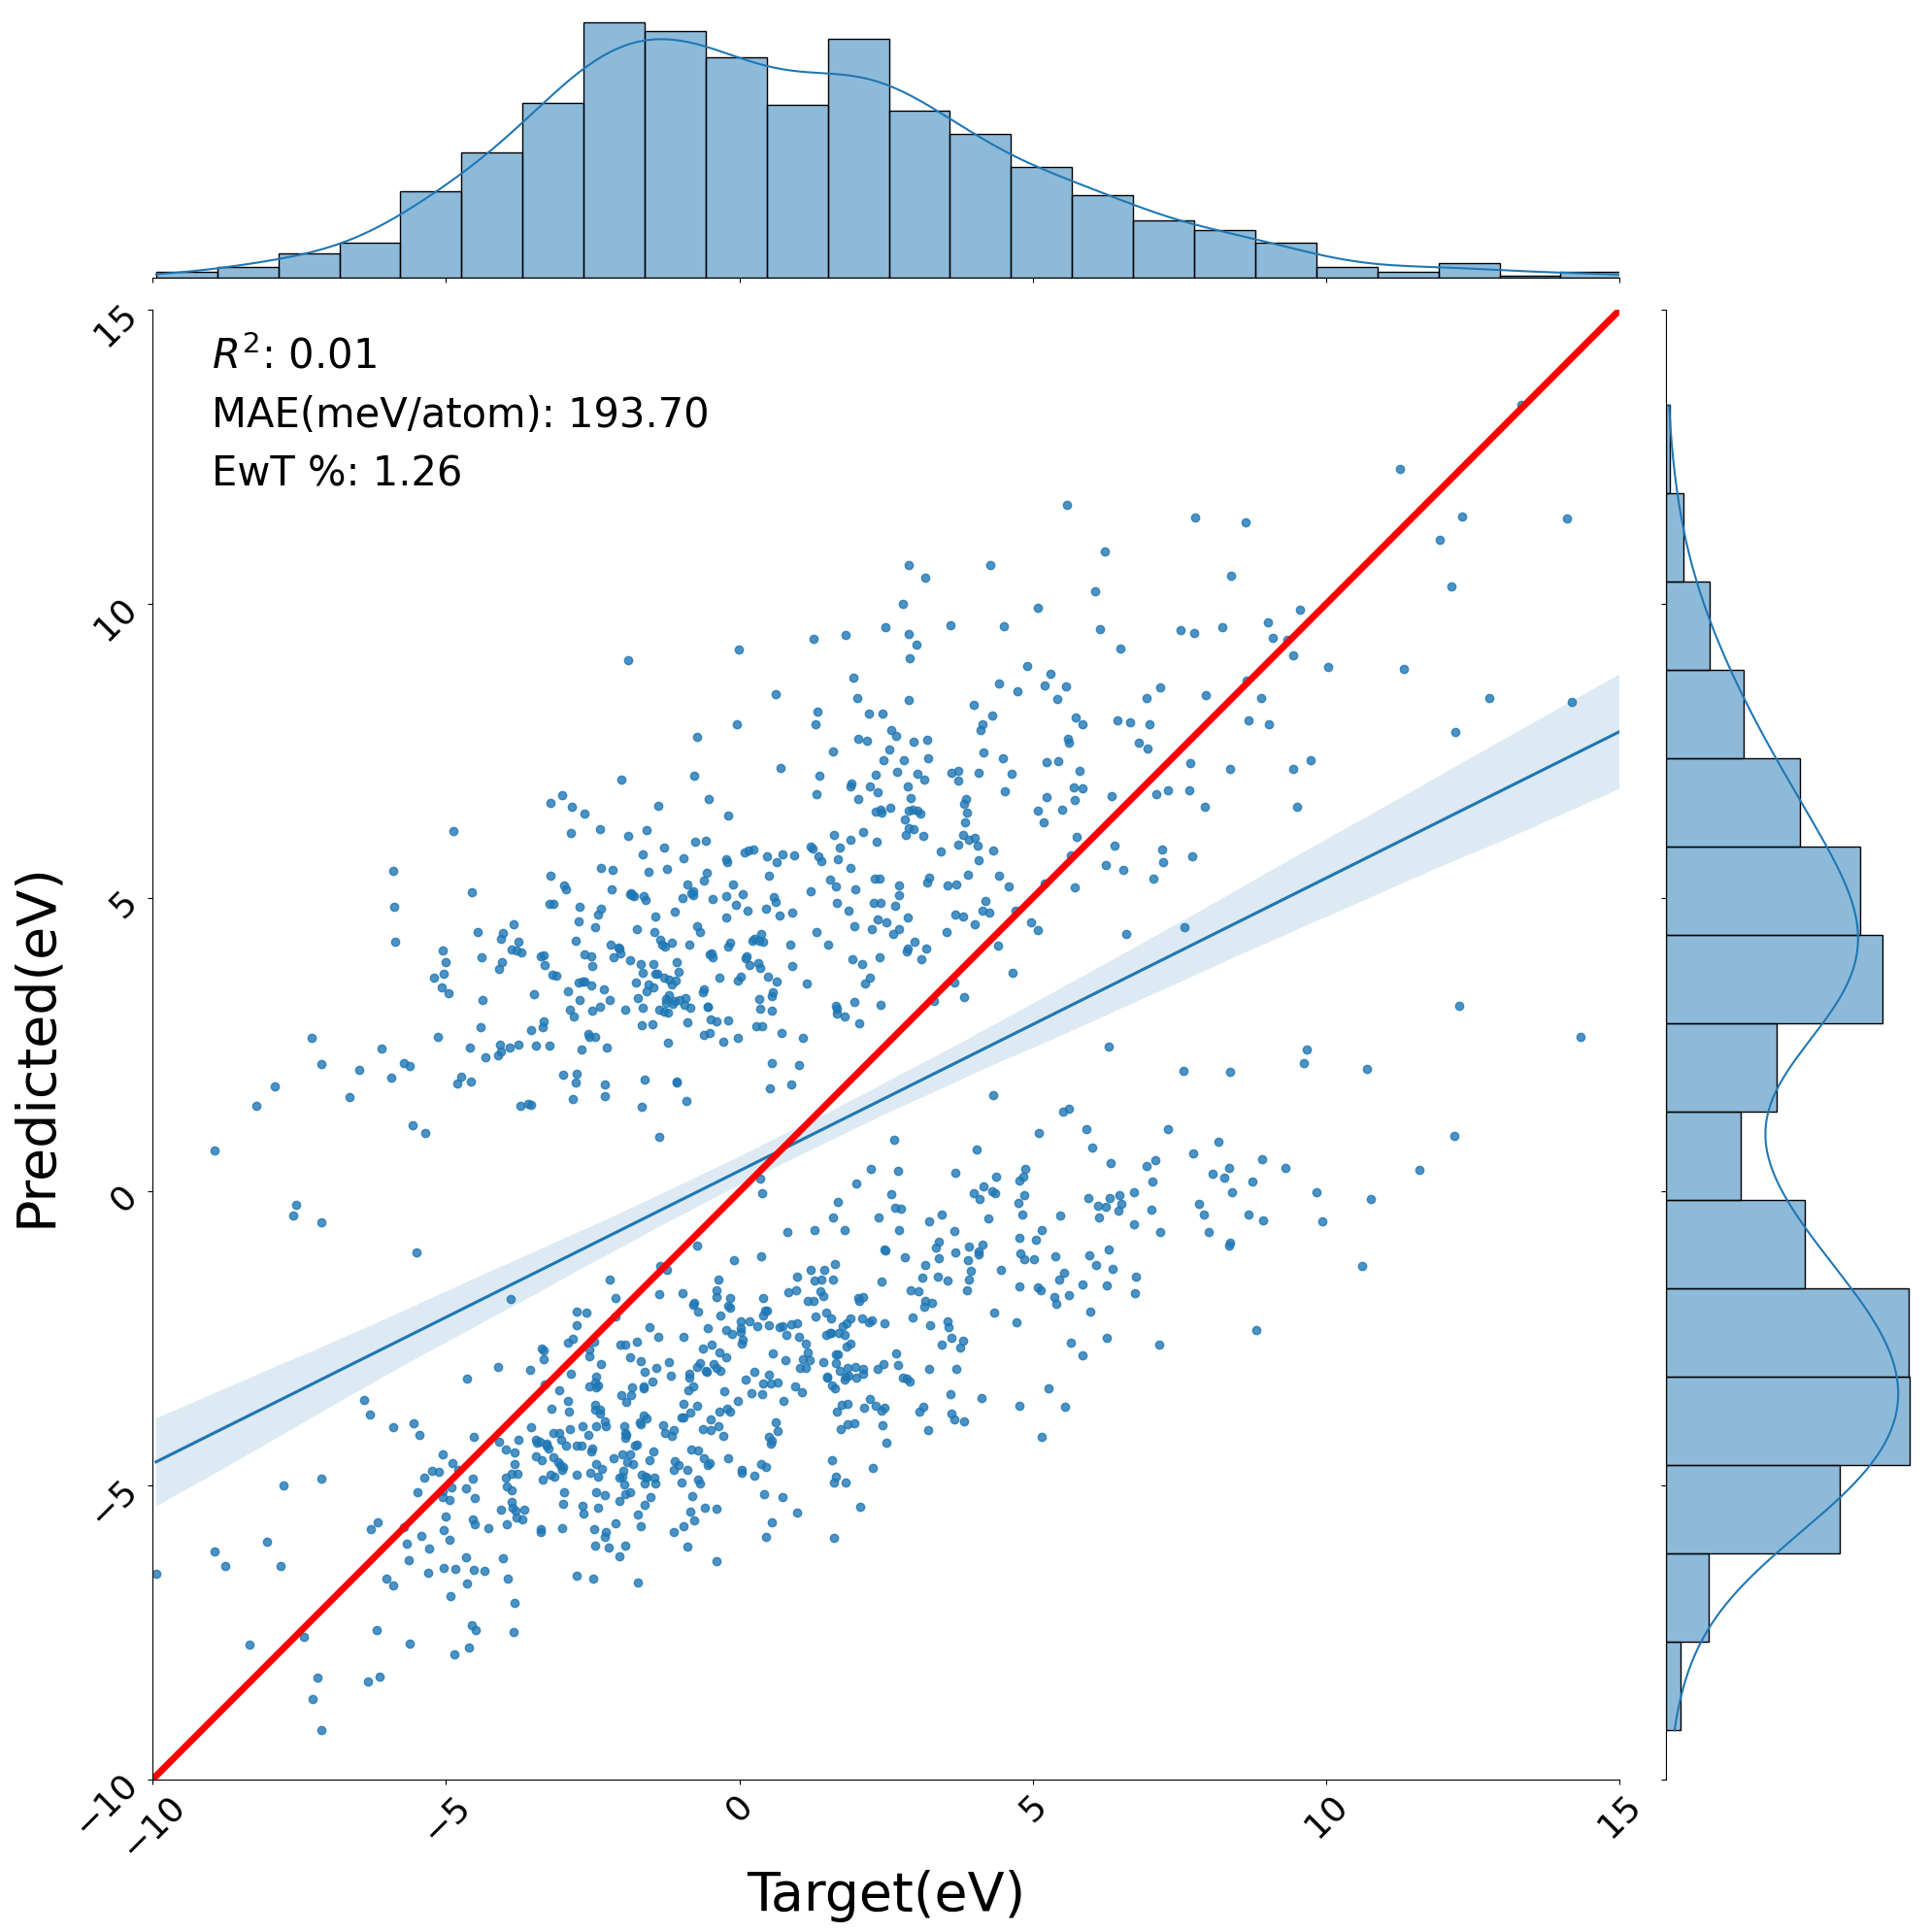

In [33]:
# specify number of bins
num_bins = 50
# make jointplots
sns.jointplot(
    x="preds",
    y="labels",
    data=df_test,
    kind="reg",
    height=20,
    space=0,
    ylim=(-10, 15),
    xlim=(-10, 15),
    # joint_kws={"line_kws": {"color": "red"}},
    # joint_kws={"gridsize": 80},
).set_axis_labels("Target(eV)", "Predicted(eV)")
# set font sizes
plt.xlabel("Target(eV)", fontsize=40)
plt.ylabel("Predicted(eV)", fontsize=40)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
# rotate xticks
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
# add diagonal line
plt.plot([-10, 15], [-10, 15], linewidth=5, color="red")
# add statistics
plt.text(
    -9,
    14,
    "$R^2$: {:.2f}".format(results_dict["base"]["statistics_dict"]["test"]["r2"]),
    fontsize=30,
)


plt.text(
    -9,
    13,
    "MAE(meV/atom): {:.2f}".format(results_dict["base"]["test_mae_per"] * 1000),
    fontsize=30,
)

plt.text(
    -9,
    12,
    "EwT %: {:.2f}".format(results_dict["base"]["test_ewt_per"] * 100),
    fontsize=30,
)
#plt.title("QTAIML(No QTAIM) Best Performance")
# add title
plt.show()


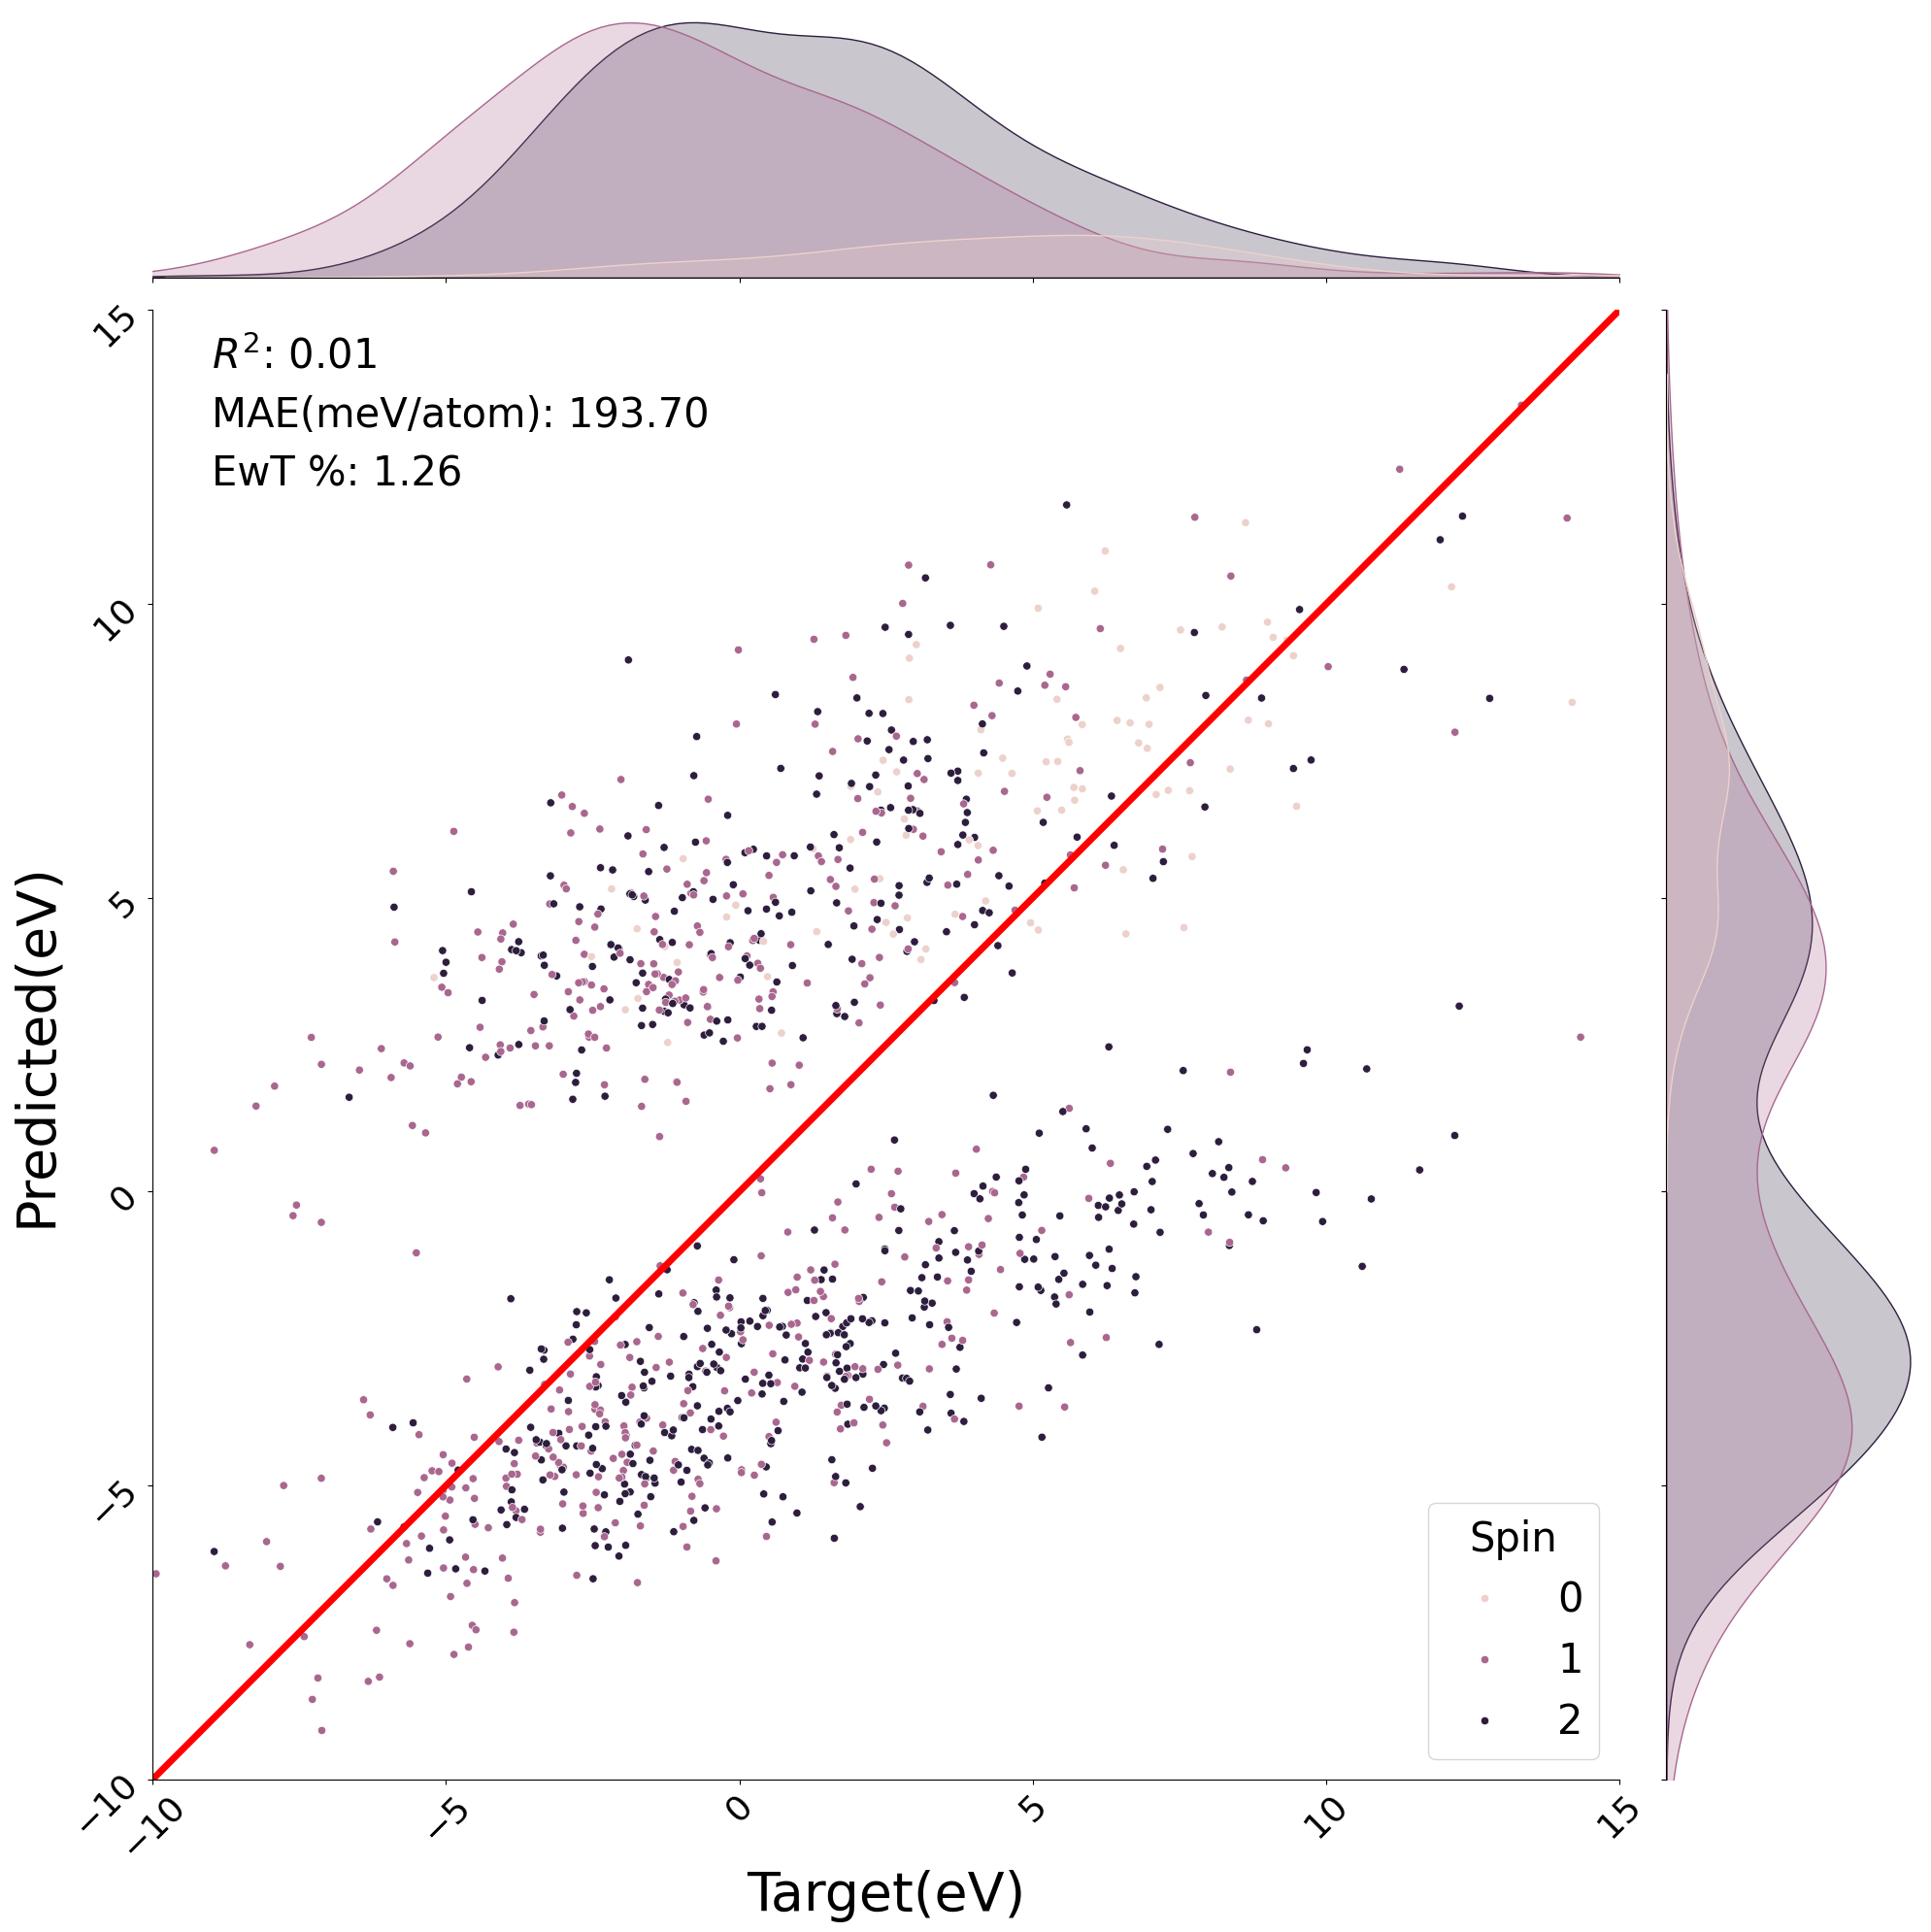

In [34]:
# specify number of bins
num_bins = 50
# make jointplots
sns.jointplot(
    x="preds",
    y="labels",
    data=df_test,
    # kind="reg",
    hue="spin",
    height=20,
    space=0,
    ylim=(-10, 15),
    xlim=(-10, 15),
    # joint_kws={"line_kws": {"color": "red"}},
    # joint_kws={"gridsize": 80},
).set_axis_labels("Target(eV)", "Predicted(eV)")
# set font sizes
plt.xlabel("Target(eV)", fontsize=40)
plt.ylabel("Predicted(eV)", fontsize=40)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
# rotate xticks
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
# add diagonal line
plt.plot([-10, 15], [-10, 15], linewidth=5, color="red")
# add statistics
plt.text(
    -9,
    14,
    "$R^2$: {:.2f}".format(results_dict["base"]["statistics_dict"]["test"]["r2"]),
    fontsize=30,
)

plt.text(
    -9,
    13,
    "MAE(meV/atom): {:.2f}".format(results_dict["base"]["test_mae_per"] * 1000),
    fontsize=30,
)

plt.text(
    -9,
    12,
    "EwT %: {:.2f}".format(results_dict["base"]["test_ewt_per"] * 100),
    fontsize=30,
)

#["test_ewt_per"] * 100
plt.legend(fontsize=30, loc="lower right", title="Spin", title_fontsize=30)
# add title
plt.show()

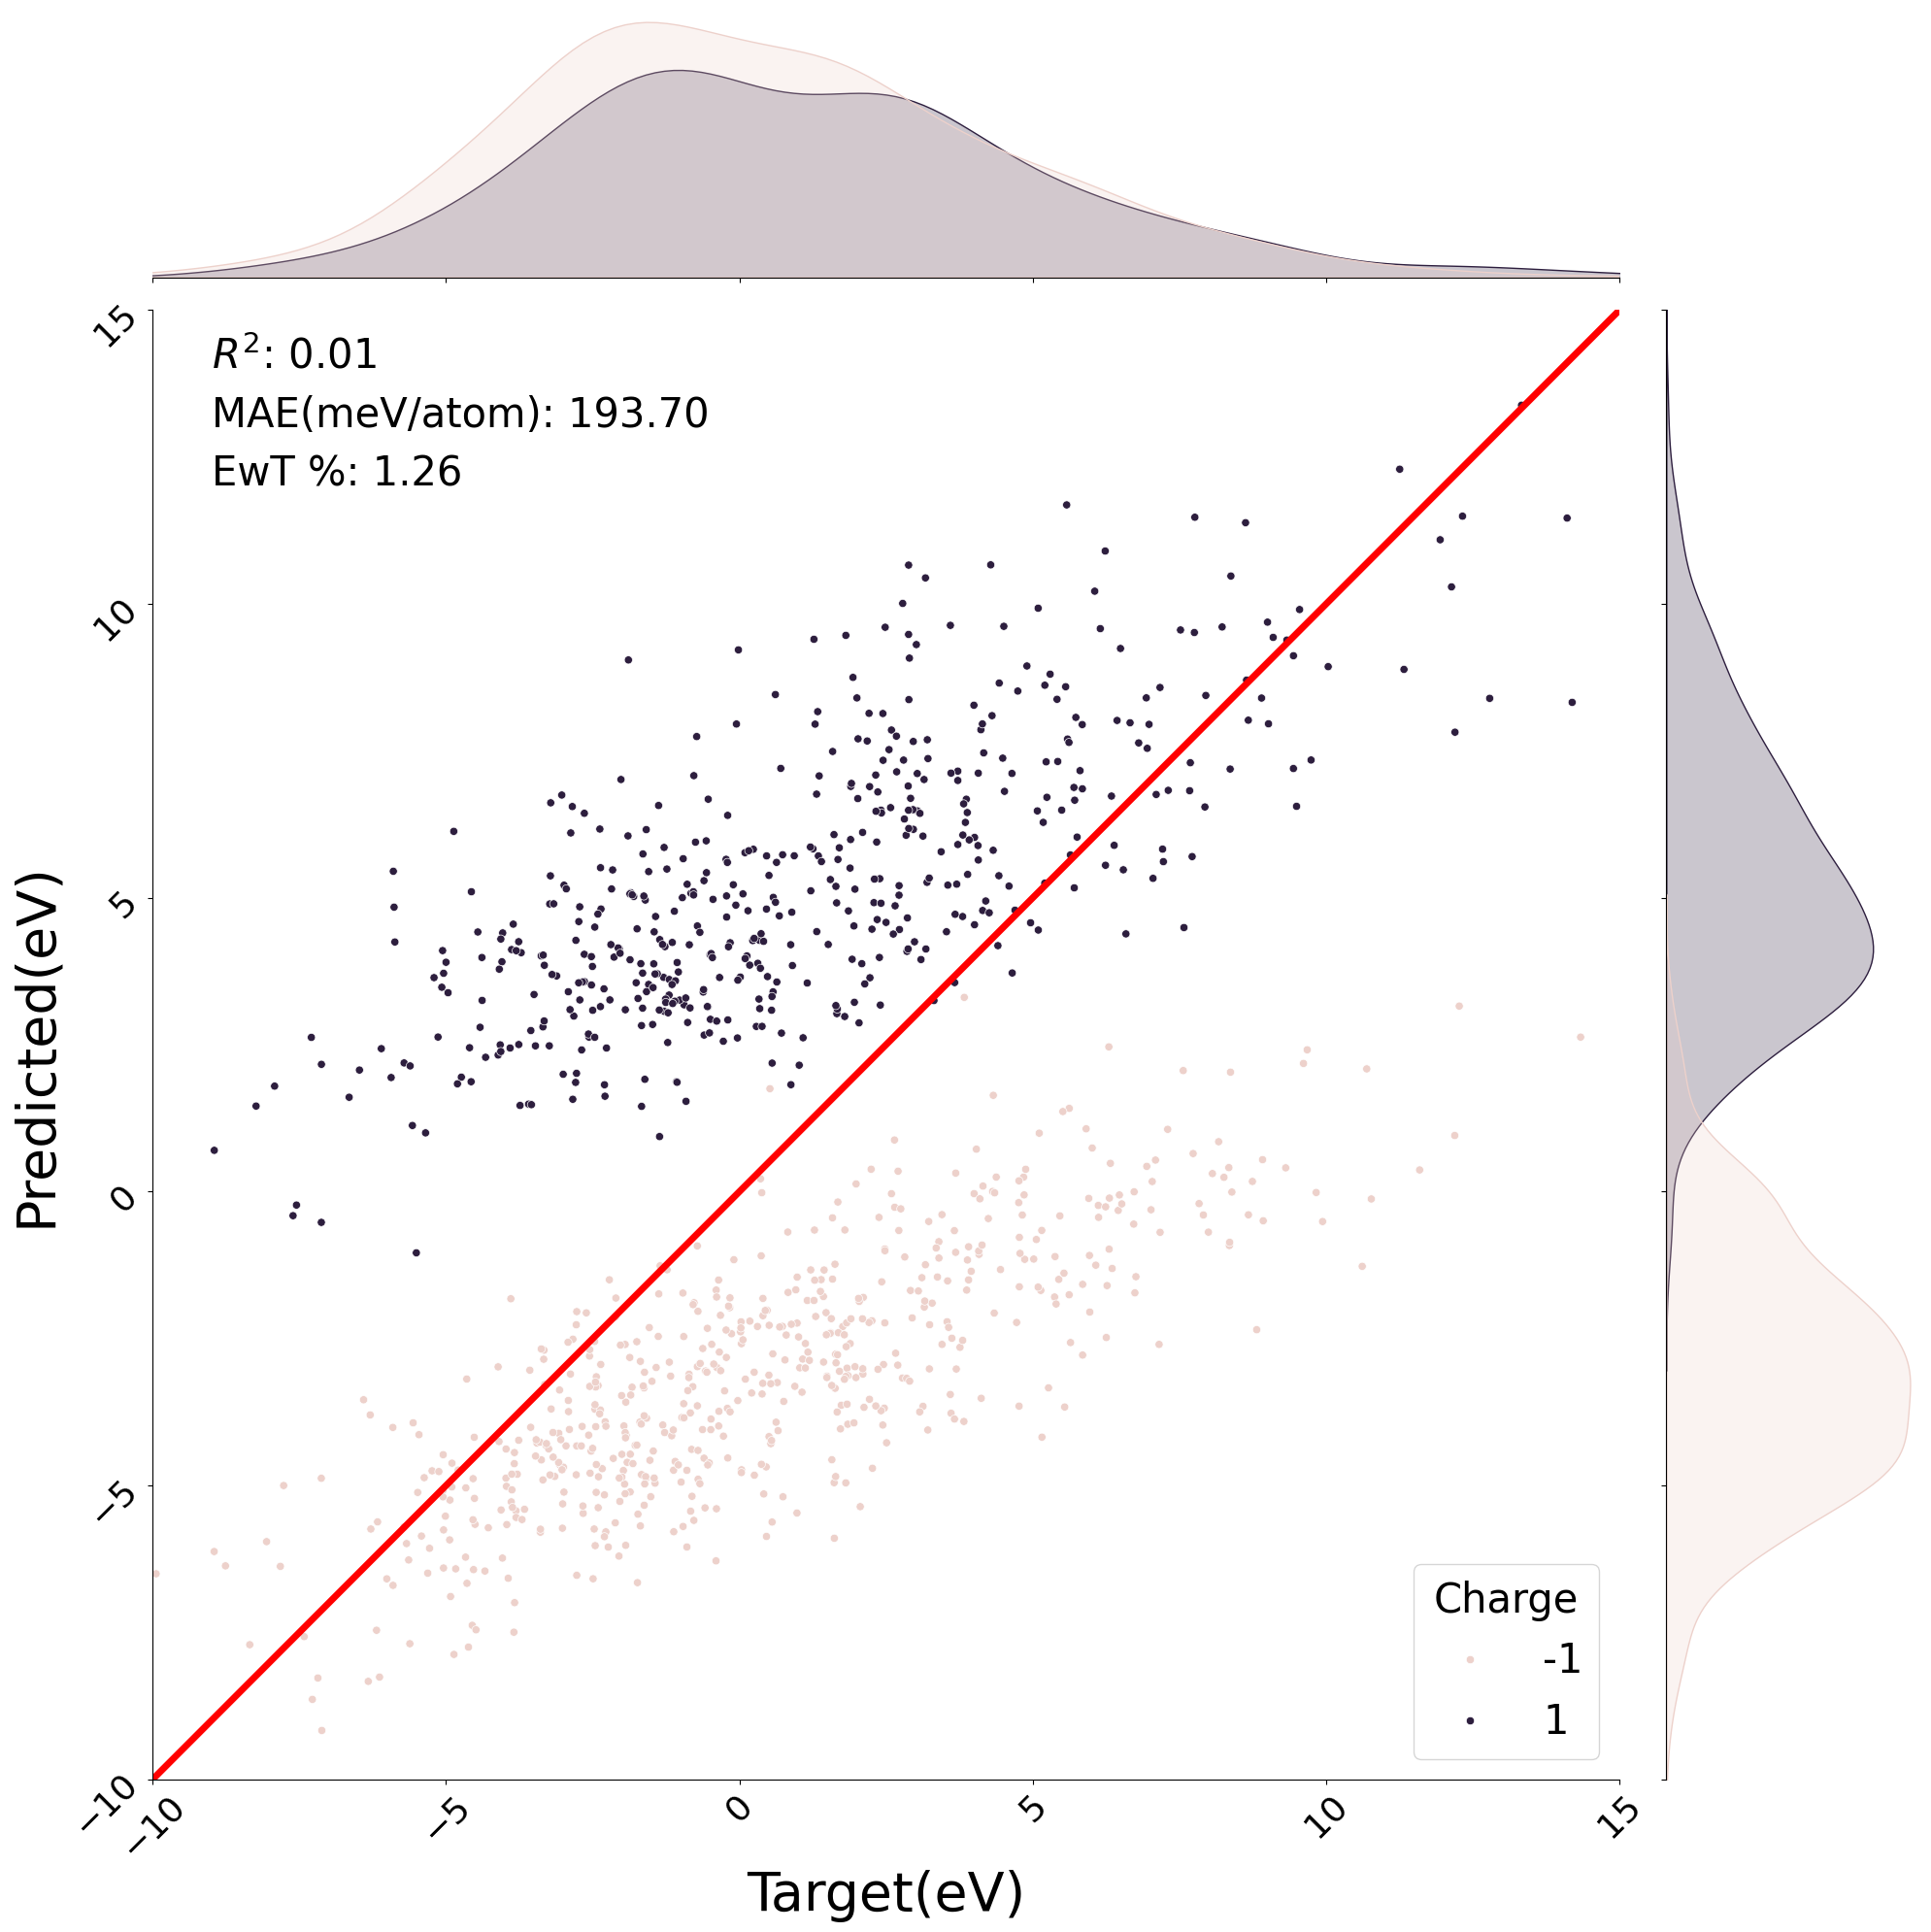

In [35]:
# specify number of bins
num_bins = 50
# make jointplots
sns.jointplot(
    x="preds",
    y="labels",
    data=df_test,
    # kind="reg",
    hue="charge",
    height=20,
    space=0,
    ylim=(-10, 15),
    xlim=(-10, 15),
    # joint_kws={"line_kws": {"color": "red"}},
    # joint_kws={"gridsize": 80},
).set_axis_labels("Target(eV)", "Predicted(eV)")
# set font sizes
plt.xlabel("Target(eV)", fontsize=40)
plt.ylabel("Predicted(eV)", fontsize=40)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
# rotate xticks
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
# add diagonal line
plt.plot([-10, 15], [-10, 15], linewidth=5, color="red")
# add statistics
plt.text(
    -9,
    14,
    "$R^2$: {:.2f}".format(results_dict["base"]["statistics_dict"]["test"]["r2"]),
    fontsize=30,
)

plt.text(
    -9,
    13,
    "MAE(meV/atom): {:.2f}".format(results_dict["base"]["test_mae_per"] * 1000),
    fontsize=30,
)

plt.text(
    -9,
    12,
    "EwT %: {:.2f}".format(results_dict["base"]["test_ewt_per"] * 100),
    fontsize=30,
)

#["test_ewt_per"] * 100
plt.legend(fontsize=30, loc="lower right", title="Charge", title_fontsize=30)
# add title
plt.show()